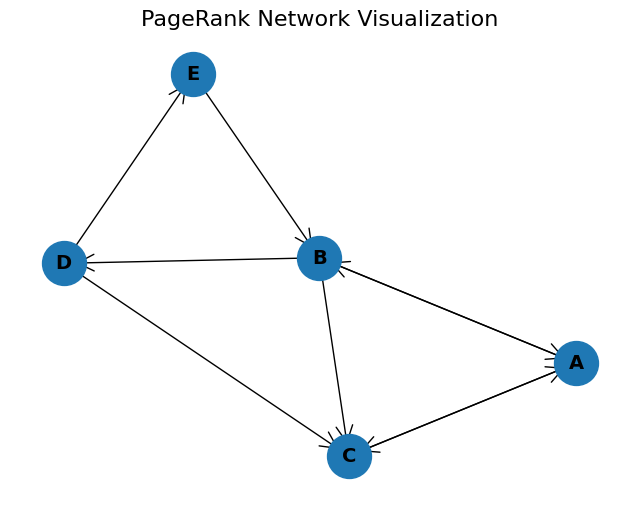

Initial PageRanks:
{'A': 0.2, 'B': 0.2, 'C': 0.2, 'D': 0.2, 'E': 0.2}

Iterations:

Step 1:  {'A': 0.2567, 'B': 0.285, 'C': 0.2567, 'D': 0.0867, 'E': 0.115}
Step 2:  {'A': 0.3289, 'B': 0.2368, 'C': 0.2567, 'D': 0.1108, 'E': 0.0668}
Step 3:  {'A': 0.3153, 'B': 0.2266, 'C': 0.284, 'D': 0.0971, 'E': 0.0771}
Step 4:  {'A': 0.3356, 'B': 0.2295, 'C': 0.2695, 'D': 0.0942, 'E': 0.0713}
Step 5:  {'A': 0.3241, 'B': 0.2332, 'C': 0.2777, 'D': 0.095, 'E': 0.07}
Step 6:  {'A': 0.3321, 'B': 0.2273, 'C': 0.2742, 'D': 0.0961, 'E': 0.0704}
Step 7:  {'A': 0.3274, 'B': 0.231, 'C': 0.2764, 'D': 0.0944, 'E': 0.0708}
Step 8:  {'A': 0.3303, 'B': 0.2294, 'C': 0.2747, 'D': 0.0954, 'E': 0.0701}
Step 9:  {'A': 0.3285, 'B': 0.23, 'C': 0.2759, 'D': 0.095, 'E': 0.0706}
Step 10:  {'A': 0.3297, 'B': 0.2296, 'C': 0.2751, 'D': 0.0952, 'E': 0.0704}
Step 11:  {'A': 0.3289, 'B': 0.2299, 'C': 0.2756, 'D': 0.0951, 'E': 0.0704}
Step 12:  {'A': 0.3294, 'B': 0.2297, 'C': 0.2753, 'D': 0.0952, 'E': 0.0704}
Step 13:  {'A': 0.3291,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define pages
pages = ['A', 'B', 'C', 'D', 'E']

# Adjacency matrix
L = np.array([
    [0, 1, 1, 0, 0],   
    [1, 0, 0, 0, 1],   
    [1, 1, 0, 1, 0],   
    [0, 1, 0, 0, 0],   
    [0, 0, 0, 1, 0],   
], dtype=float) 

n = len(pages)
damping = 0.85

# Draw the graph
graph = nx.DiGraph()
for i in range(n):
    for j in range(n):
        if L[i, j] > 0:
            graph.add_edge(pages[j], pages[i])  


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, node_size=1000)
nx.draw_networkx_edges(graph, pos, arrowstyle='->', arrowsize=30)
nx.draw_networkx_labels(graph, pos, font_size=14, font_weight='bold')
plt.title("PageRank Network Visualization", fontsize=16)
plt.axis('off')
plt.show()


# Fix dangling and normalize
for j in range(n):
    col_sum = np.sum(L[:, j])
    if col_sum == 0:
        L[:, j] = 1.0 / n
    else:
        L[:, j] /= col_sum

# Google matrix
G = damping * L + (1 - damping) * (1.0 / n) * np.ones((n, n))

# PageRank computation with printed steps
r = np.ones(n) / n
print("Initial PageRanks:")
print({pages[i]: round(r[i], 4) for i in range(n)})
print("\nIterations:\n")

for step in range(1, 101):
    r_new = G @ r
    print(f"Step {step}: ", {pages[i]: round(r_new[i], 4) for i in range(n)})
    if np.allclose(r, r_new, atol=1e-6):
        print("\nConverged.")
        break
    r = r_new

print("\nFinal PageRanks:")
for i in range(n):
    print(f"{pages[i]}: {r[i]:.4f}")
